## 1. Завантажте набір даних про дитячі імена США з веб-сайту kaggle.com (https://www.kaggle.com/kaggle/us-baby-names?select=NationalNames.csv)

## 2. Виконайте вправи по варіантах.
## Варіант 5

In [1]:
import numpy as np
import pandas as pd

In [2]:
csv_file_path = 'D:\\Anaconda\\anacondaFiles\\NationalNames.csv'
try:
    df = pd.read_csv(csv_file_path)    
except FileNotFoundError:
    print(f"File not found: {csv_file_path}")

## 2. Вивести останні 8 рядків набору даних.

In [3]:
display(df.tail(8))

,Id,Name,Year,Gender,Count
1825425,1825426,Zo,2014,M,5
1825426,1825427,Zyeir,2014,M,5
1825427,1825428,Zyel,2014,M,5
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5
1825432,1825433,Zyrin,2014,M,5


## 4. Отримайте загальну інформацію про дані у наборі даних.

In [4]:
display(df.describe())

,Id,Year,Count
count,1.825433e+06,1.825433e+06,1.825433e+06
mean,9.127170e+05,1.972620e+03,1.846879e+02
std,5.269573e+05,3.352891e+01,1.566711e+03
min,1.000000e+00,1.880000e+03,5.000000e+00
25%,4.563590e+05,1.949000e+03,7.000000e+00
50%,9.127170e+05,1.982000e+03,1.200000e+01
75%,1.369075e+06,2.001000e+03,3.200000e+01
max,1.825433e+06,2.014000e+03,9.968000e+04


## 6. Обчисліть кількість унікальних жіночих та чоловічих імен у цілому наборі даних

In [5]:
unique_names = df['Name'].unique()
male_names_count = df[df['Gender'] == 'M']['Name'].nunique()
female_names_count = df[df['Gender'] == 'F']['Name'].nunique()

result = pd.DataFrame({
    'Gender': ['F', 'M'],
    'Name': [female_names_count, male_names_count]
})

print(result)

  Gender   Name
0      F  64911
1      M  39199


## 7. Знайдіть 5 найпопулярніших чоловічих імен у 2010 році

In [6]:
df_2010_male = df[(df['Year'] == 2010) & (df['Gender'] == 'M')]

sorted_df = df_2010_male.sort_values(by='Count', ascending=False)

top_5_male_names = sorted_df.head(5)[['Id', 'Name','Year','Gender', 'Count']]


print(top_5_male_names)

              Id     Name  Year Gender  Count
1677392  1677393    Jacob  2010      M  22082
1677393  1677394    Ethan  2010      M  17985
1677394  1677395  Michael  2010      M  17308
1677395  1677396   Jayden  2010      M  17152
1677396  1677397  William  2010      M  17030


## 9. Підрахуйте кількість записів, для яких Count - мінімальне у наборі.

In [7]:
min_count = df['Count'].min()

min_count_records = df[df['Count'] == min_count]

count_min_records = min_count_records.shape[0]
print(count_min_records)

254615


## 10. Підрахуйте кількість унікальних імен у кожному році

In [8]:
unique_names_by_year = df.groupby('Year')['Name'].nunique()

print(unique_names_by_year)

Year
1880     1889
1881     1830
1882     2012
1883     1962
1884     2158
        ...  
2010    31603
2011    31418
2012    31236
2013    30774
2014    30579
Name: Name, Length: 135, dtype: int64


## 15. Знайдіть загальну кількість народжень за рік.

In [9]:
births_by_year = df.groupby('Year')['Count'].sum()

print(births_by_year)

Year
1880     201484
1881     192699
1882     221538
1883     216950
1884     243467
         ...   
2010    3686589
2011    3646730
2012    3643336
2013    3626802
2014    3670151
Name: Count, Length: 135, dtype: int64


## 16. Знайдіть рік, коли народилося найбільше дітей

In [10]:
max_births_year = births_by_year.idxmax()

print("Рік з найбільшою кількістю народжень:", max_births_year)

Рік з найбільшою кількістю народжень: 1957


## 17. Знайдіть кількість дівчаток та хлопчиків, які народились кожного року

In [11]:
gender_counts_per_year = df.groupby(['Year', 'Gender']).sum()['Count'].unstack()

# Виведення результату
print("Кількість народжень дівчаток та хлопчиків за роками:")
print(gender_counts_per_year)

Кількість народжень дівчаток та хлопчиків за роками:
Gender        F        M
Year                    
1880      90993   110491
1881      91954   100745
1882     107850   113688
1883     112321   104629
1884     129022   114445
...         ...      ...
2010    1772738  1913851
2011    1753500  1893230
2012    1753922  1889414
2013    1745339  1881463
2014    1768775  1901376

[135 rows x 2 columns]


## 18. Підрахуйте кількість років, коли дівчаток народжувалось більше, ніж хлопчиків.

In [12]:
gender_counts = df.groupby(['Year', 'Gender']).sum()['Count'].unstack(fill_value=0)

years_with_more_girls = (gender_counts['F'] > gender_counts['M']).sum()

print(f"Кількість років, коли дівчаток народжувалось більше, ніж хлопчиків: {years_with_more_girls}")


Кількість років, коли дівчаток народжувалось більше, ніж хлопчиків: 54


## 20. Підрахуйте кількість гендерно-нейтральних імен (однакових для дівчат та хлопців)

In [13]:
female_names = set(df[df['Gender'] == 'F']['Name'])
male_names = set(df[df['Gender'] == 'M']['Name'])

gender_neutral_names = female_names.intersection(male_names)

count_gender_neutral_names = len(gender_neutral_names)

print(f"Кількість гендерно-нейтральних імен: {count_gender_neutral_names}")

Кількість гендерно-нейтральних імен: 10221


## 21. Порахуйте, скільки разів хлопчиків називали Barbara

In [14]:
barbara_male_count = df[(df['Name'] == 'Barbara') & (df['Gender'] == 'M')]['Count'].sum()

print("Кількість хлопчиків з ім'ям Barbara:", barbara_male_count)

Кількість хлопчиків з ім'ям Barbara: 4139


## 22. Підрахуйте скільки років проводилось спостереження

In [15]:
observation_years = df['Year'].max() - df['Year'].min() + 1

print("Cпостереження проводилось", observation_years, "років")

Cпостереження проводилось 135 років


## 23. Знати найпопулярніші гендерно-нейтральні імена (ті, що присутні кожного року)

In [16]:

# Припустимо, що df - це ваш DataFrame з даними
# Завантажте або створіть df

# Отримуємо унікальні жіночі та чоловічі імена для кожного року
neutral_names_by_year = {}

for year in df['Year'].unique():
    female_names = set(df[(df['Gender'] == 'F') & (df['Year'] == year)]['Name'])
    male_names = set(df[(df['Gender'] == 'M') & (df['Year'] == year)]['Name'])
    neutral_names_by_year[year] = female_names.intersection(male_names)

# Знаходимо гендерно-нейтральні імена, які присутні кожного року
common_neutral_names = set.intersection(*neutral_names_by_year.values())

# Виводимо найпопулярніші гендерно-нейтральні імена
print(common_neutral_names)


{'Leslie', 'Robert', 'Tommie', 'John', 'Joseph', 'Jean', 'Lee', 'Francis', 'William', 'Sidney', 'Johnnie', 'Marion', 'James', 'Jessie', 'Jesse', 'Ollie'}


## 24. Знайти найпопулярніше серед непопулярних імен (непопулярне ім’я, яким називали дітей найбільшу кількість разів )

In [17]:
# Знайдіть загальну кількість народжень для кожного імені в кожному році
total_counts_per_name_year = df.groupby(['Year', 'Name'])['Count'].sum().reset_index()

# Знайдіть найменш популярні імена по роках
most_unpopular_names_per_year = total_counts_per_name_year.loc[total_counts_per_name_year.groupby('Year')['Count'].idxmin()]

# Створіть список найнепопулярніших імен за всі роки
most_unpopular_names_overall = most_unpopular_names_per_year.groupby('Name')['Count'].sum().idxmax()

# Виведення результату
print(f"Найпопулярніше серед найменш популярних імен за всі роки: {most_unpopular_names_overall}")


Найпопулярніше серед найменш популярних імен за всі роки: Abb


## 25. Побудувати графіки розподілення кількості імен John та Mary по роках без залежності до статі.

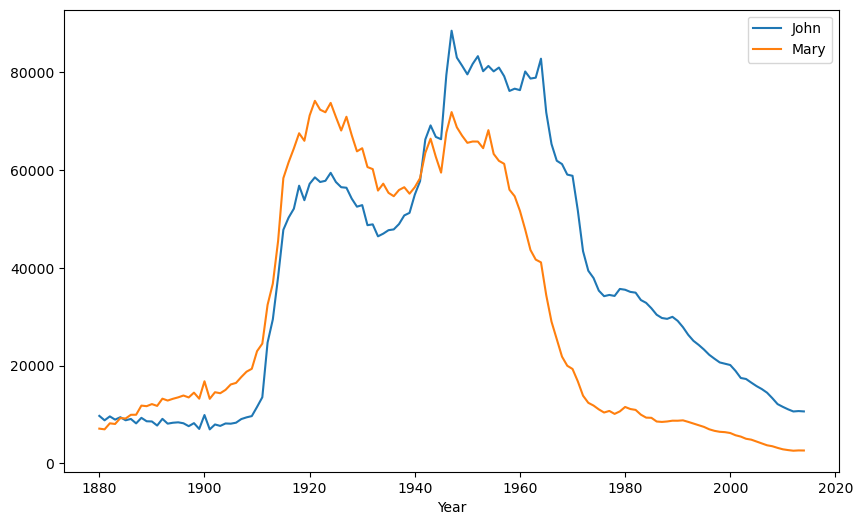

In [18]:
import matplotlib.pyplot as plt

name_counts = df.groupby(['Year', 'Name'])['Count'].sum()
john_data = name_counts.loc[:, 'John']
mary_data = name_counts.loc[:, 'Mary']

plt.figure(figsize=(10, 6))
plt.plot(john_data.index, john_data.values, label='John')
plt.plot(mary_data.index, mary_data.values, label='Mary')
plt.xlabel('Year')
plt.legend()
plt.show()

## 26. Побудувати графіки розподілення кількості жіночих імен John та чоловічих імен Mary по роках.

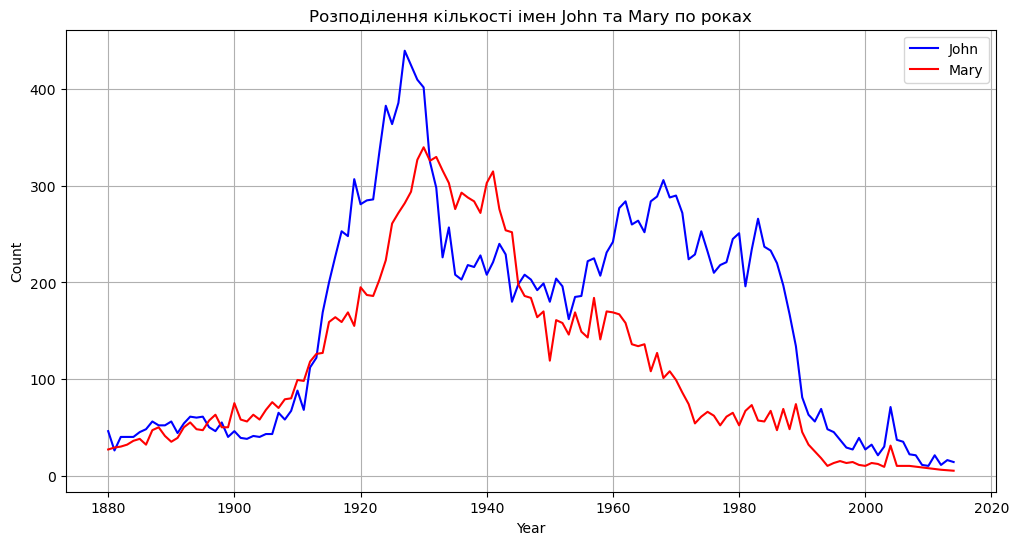

In [19]:
import matplotlib.pyplot as plt

john_data = df[(df['Name'] == 'John') & (df['Gender'] == 'F')]
mary_data = df[(df['Name'] == 'Mary') & (df['Gender'] == 'M')]

john_counts_by_year = john_data.groupby('Year')['Count'].sum()
mary_counts_by_year = mary_data.groupby('Year')['Count'].sum()

plt.figure(figsize=(12, 6))
plt.plot(john_counts_by_year.index, john_counts_by_year.values, label='John', color='blue')
plt.plot(mary_counts_by_year.index, mary_counts_by_year.values, label='Mary', color='red')
plt.title('Розподілення кількості імен John та Mary по роках')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

## 27. Знайти найпопулярніші імена в кожному році.

In [20]:
most_popular_names_by_year = df.loc[df.groupby('Year')['Count'].idxmax()][['Year', 'Name', 'Count']]

print(most_popular_names_by_year.to_string(index=False))

 Year     Name  Count
 1880     John   9655
 1881     John   8769
 1882     John   9557
 1883     John   8894
 1884     John   9388
 1885     Mary   9128
 1886     Mary   9890
 1887     Mary   9888
 1888     Mary  11754
 1889     Mary  11648
 1890     Mary  12078
 1891     Mary  11703
 1892     Mary  13173
 1893     Mary  12784
 1894     Mary  13151
 1895     Mary  13446
 1896     Mary  13811
 1897     Mary  13413
 1898     Mary  14406
 1899     Mary  13172
 1900     Mary  16707
 1901     Mary  13136
 1902     Mary  14486
 1903     Mary  14275
 1904     Mary  14962
 1905     Mary  16067
 1906     Mary  16370
 1907     Mary  17580
 1908     Mary  18666
 1909     Mary  19259
 1910     Mary  22848
 1911     Mary  24390
 1912     Mary  32303
 1913     Mary  36641
 1914     Mary  45344
 1915     Mary  58187
 1916     Mary  61437
 1917     Mary  64280
 1918     Mary  67370
 1919     Mary  65840
 1920     Mary  70976
 1921     Mary  73985
 1922     Mary  72171
 1923     Mary  71634
 1924     